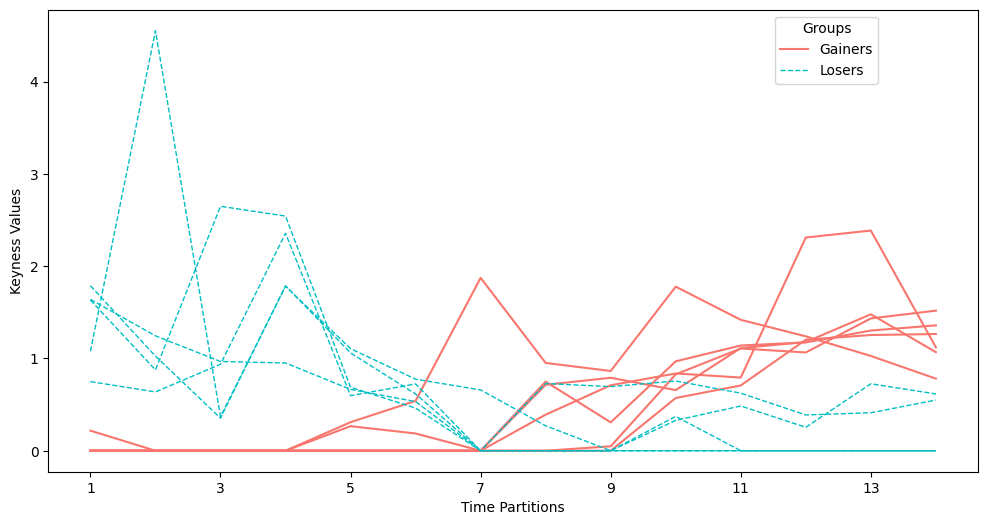

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Read the CSV file
data = pd.read_csv('/home/pgajo/working/diachronic study/fdb_terms_diachronic_study_line_chart.csv', index_col='Item')

# Separate gainers and losers
gainers = data[data['Group'] == 'gainer'].drop(columns=['Group'])
losers = data[data['Group'] == 'loser'].drop(columns=['Group'])

# Plot the line chart
ax = gainers.T.plot(figsize=(12, 6), color='#f8766d', linestyle='-')
losers.T.plot(ax=ax, color='#00bfc4', linestyle='--', linewidth=1)

# Customize the chart
# plt.title('Keyness Values Over Time - Incels.is')
plt.xlabel('Time Partitions')
plt.ylabel('Keyness Values')

# Create legend handles and display the legend
red_line = mlines.Line2D([], [], color='#f8766d', label='Gainers', linestyle='-')
blue_line = mlines.Line2D([], [], color='#00bfc4', label='Losers', linestyle='--', linewidth=1)
plt.legend(handles=[red_line, blue_line], title='Groups', loc='upper right', bbox_to_anchor=(0.9, 1))

# Display the chart
plt.show()
